### Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [2]:
data = pd.read_csv("verb_object_df.csv", index_col=0)

In [3]:
data.head()

,tegema,saama,tundma,andma,sõlmima,teadma,maksma,pidama,võtma,pöörama,...,mountima,uvitama,nattima,sailitama,võrdlustama,nendevastuma,postima,väärindama,hapustama,inhibeerima
see,69534,9208,2789,6079,288,13465,2402,12953,12901,273,...,0,0,3,0,0,0,0,0,0,0
mis,46616,7582,3492,7881,834,5235,3286,8315,8511,116,...,0,0,0,0,0,0,0,0,0,0
tema,3881,2438,3037,1798,82,1208,285,4119,5879,98,...,0,0,0,0,3,0,0,0,0,0
ise,1552,374,20326,1257,5,216,279,6065,2645,430,...,0,0,0,0,0,0,0,0,0,0
miski,22786,4216,571,2191,16,9647,1595,315,6522,29,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data.T

In [5]:
data.head()

,see,mis,tema,ise,miski,mina,raha,töö,asi,inimene,...,tööpakkumiskuulutus,tuumarajatis,rahanduspoliitika,intensiivkursus,vilt,tekstuur,lemmiklugu,alluvus,Malle,dzhäss
tegema,69534,46616,3881,1552,22786,2523,798,32296,9135,1373,...,0,0,0,0,7,4,0,0,0,3
saama,9208,7582,2438,374,4216,634,9664,2855,3108,1428,...,0,0,0,3,0,6,0,0,0,0
tundma,2789,3492,3037,20326,571,1258,31,252,465,1190,...,0,0,0,0,0,0,0,0,0,0
andma,6079,7881,1798,1257,2191,357,5028,2598,1243,294,...,0,0,0,0,0,7,0,5,0,0
sõlmima,288,834,82,5,16,16,9,9,6,18,...,0,0,0,0,0,0,0,0,0,0


### Optimizing LDA

In [6]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

0:31:24.489627
Model with 100 topics fitted and perplexity found at 0:32:26.936224.
Model with 200 topics fitted and perplexity found at 0:34:25.990448.
Model with 300 topics fitted and perplexity found at 0:37:19.931201.
Model with 400 topics fitted and perplexity found at 0:41:42.529551.
Model with 500 topics fitted and perplexity found at 0:46:48.663558.
Model with 600 topics fitted and perplexity found at 0:52:57.699340.
Model with 700 topics fitted and perplexity found at 0:59:34.467970.
Model with 800 topics fitted and perplexity found at 1:07:40.948650.
Model with 900 topics fitted and perplexity found at 1:17:04.999725.
Model with 1000 topics fitted and perplexity found at 1:27:07.169454.
1:27:07.177962
0:55:42.688345


In [7]:
perplexities

{100: 393.7354347701236,
 200: 342.44395624628794,
 300: 329.83415501770793,
 400: 319.6926864180307,
 500: 313.94578542240055,
 600: 310.3588412946141,
 700: 309.8131065797838,
 800: 310.1225666264678,
 900: 309.5810408528483,
 1000: 309.24847868186316}

In [8]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

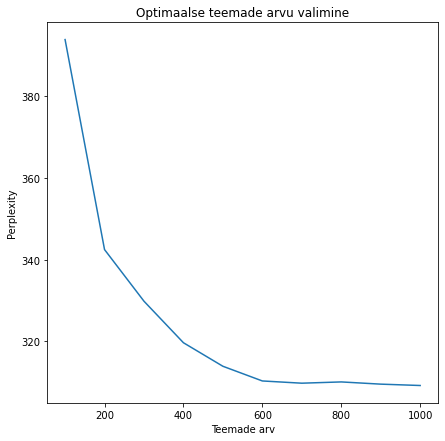

In [9]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")